In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from wpimath.spline import SplineParameterizer
from typing import Tuple

from motion import plot_splines

(<AxesSubplot:>,
  <wpimath.spline._spline.QuinticHermiteSpline at 0x10b1d6670>])

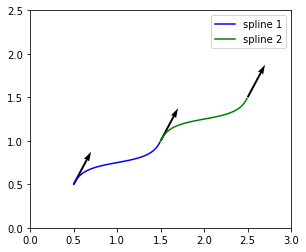

In [2]:
waypoints = [
    ((0.5, 0.5), (0.4, 0.75)),
    ((1.5, 1.0), (0.4, 0.75)),
    ((2.5, 1.5), (0.4, 0.75))
]
plot_splines(waypoints=waypoints, xlim=(0, 3), ylim=(0, 2.5))

(<AxesSubplot:>,
  <wpimath.spline._spline.QuinticHermiteSpline at 0x1295f1ab0>])

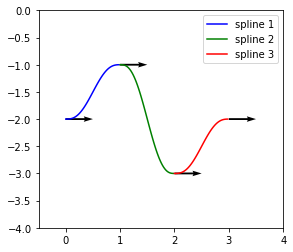

In [3]:
waypoints = [
    ((0, -2), (1, 0)),
    ((1, -1), (1, 0)),
    ((2, -3), (1, 0)),
    ((3, -2), (1, 0)),
]

plot_splines(waypoints=waypoints, xlim=(-0.5, 4), ylim=(-4, 0))

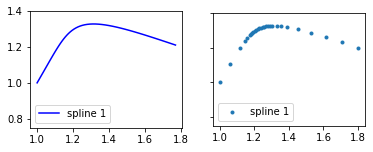

In [19]:
start_angle = math.radians(60)
end_angle = math.radians(-40)
waypoints = [
    ((1, 1), (1 * math.cos(start_angle), 1 * math.sin(start_angle))),
    ((1.8, 1.2), (2 * math.cos(end_angle), 0.8 * math.sin(end_angle))),
]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

_, splines = plot_splines(ax1, waypoints, ylim=(0.75, 1.4), show_vectors=False)

poses_with_curvature = SplineParameterizer.parameterize(splines[-1])

ax2.set_aspect("equal", "box")
# ax2.set_xlim(1, 1.5)
ax2.scatter([pose.X() for (pose, _) in poses_with_curvature], [pose.Y() for (pose, _) in poses_with_curvature], marker='.', label="spline 1")
ax2.legend()
plt.savefig('spline-parameterized.svg')
plt.show()

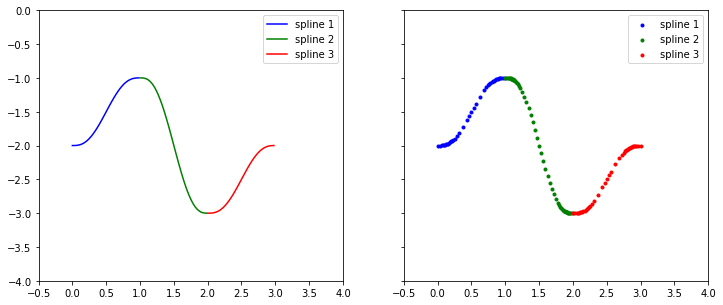

In [36]:
waypoints = [
    ((0, -2), (1, 0)),
    ((1, -1), (1, 0)),
    ((2, -3), (1, 0)),
    ((3, -2), (1, 0)),
]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(0.75*16, 0.75*9))

_, splines = plot_splines(ax1, waypoints=waypoints, xlim=(-0.5, 4), ylim=(-4, 0), show_vectors=False)

poses_0 = SplineParameterizer.parameterize(splines[0])
poses_1 = SplineParameterizer.parameterize(splines[1])
poses_2 = SplineParameterizer.parameterize(splines[2])

ax2.scatter([pose.X() for (pose, _) in poses_0], [pose.Y() for (pose, _) in poses_0], marker='.', color='b', label="spline 1")
ax2.scatter([pose.X() for (pose, _) in poses_1], [pose.Y() for (pose, _) in poses_1], marker='.', color='g', label="spline 2")
ax2.scatter([pose.X() for (pose, _) in poses_2], [pose.Y() for (pose, _) in poses_2], marker='.', color='r', label="spline 3")

ax2.set_aspect("equal", "box")
ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-4, 0)
ax2.legend()
fig.savefig('splines-parameterized.svg')
plt.show()